In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants


(-0.1, 0.1)

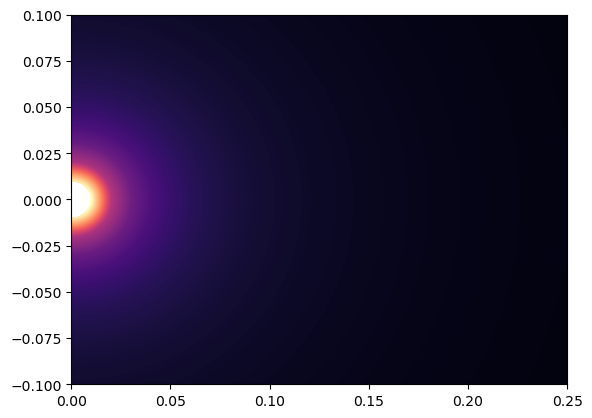

In [13]:
def e_field(r, theta, phi):
    k = 1 / 4*np.pi*constants.epsilon_0
    const = k / r

    Er = const*3
    Etheta = const*2*np.sin(theta)*np.cos(theta)*np.sin(phi)
    Ephi = const*np.sin(theta)*np.cos(phi)
    
    E_mag = np.sqrt(Er**2 + Etheta**2 + Ephi**2)

    return E_mag

r = np.linspace(0.01, 1, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

R, Theta, Phi = np.meshgrid(r, theta, phi)

E_field = e_field(R, Theta, Phi)
E_field = E_field[:, :, 0]

X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

lim = 0.1
plt.contourf(X[:, :, 0], Z[:, :, 0], E_field, levels = 1000, cmap = 'magma')
plt.xlim(0, 2.5*lim)
plt.ylim(-lim,lim)

In [37]:
k = 1  # You can adjust the value of k as needed

# Define the field function
def E_field(r):
    # Extracting components of r
    x, y, z = r
    # Compute r magnitude
    r_mag = np.sqrt(x**2 + y**2 + z**2)
    # Compute spherical coordinates
    r_hat = np.array([x/r_mag, y/r_mag, z/r_mag])
    theta = np.arccos(z/r_mag)
    phi = np.arctan2(y, x)
    
    # Compute E field components
    E_r = k / r_mag * (3 * r_hat)
    E_theta = k / r_mag * (2 * np.sin(theta) * np.cos(theta) * np.sin(phi)) * np.array([np.cos(theta), np.sin(theta), 0])
    E_phi = k / r_mag * (np.sin(theta) * np.cos(phi)) * np.array([-np.sin(phi), np.cos(phi), 0])
    
    return E_r + E_theta + E_phi

In [47]:
# Define the range for plotting
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

In [48]:
# Initialize electric field components
Ex, Ey = np.zeros_like(X), np.zeros_like(Y)

In [49]:
# Compute electric field at each point
for i in range(len(x)):
    for j in range(len(y)):
        r = [X[i,j], Y[i,j], 0]  # Considering z = 0 for the xy-plane
        E = E_field(r)
        Ex[i,j], Ey[i,j] = E[0], E[1]  # Projecting onto xy-plane

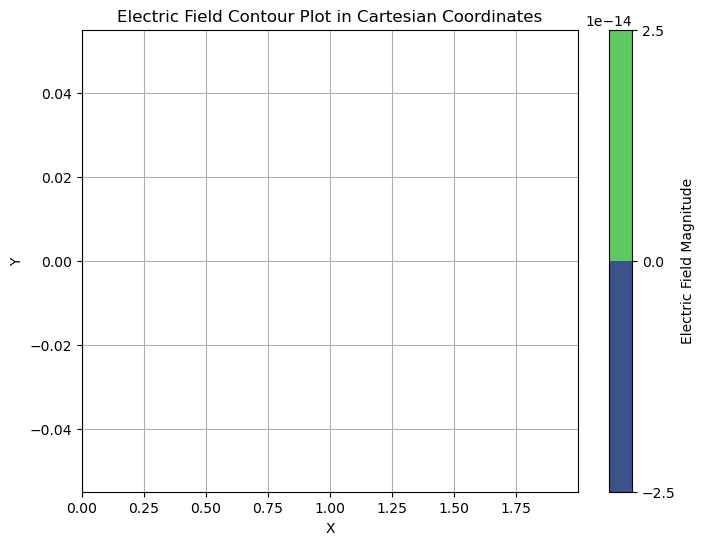

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 1  # You can adjust the value of k as needed

# Define the field function
def E_field(r, theta, phi):
    # Compute E field components in spherical coordinates
    E_r = k / r * (3 * np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)]))
    E_theta = k / r * (2 * np.sin(theta) * np.cos(theta) * np.sin(phi)) * np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    E_phi = k / r * (np.sin(theta) * np.cos(phi)) * np.array([-np.sin(phi), np.cos(phi), 0])
    
    return np.sqrt((E_r**2).sum() + (E_theta**2).sum() + (E_phi**2).sum())

# Define the range for plotting
r_values = np.linspace(0.01, 2, 100)  # Avoiding r=0 for singularity
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2*np.pi, 100)
R, Theta, Phi = np.meshgrid(r_values, theta_values, phi_values, indexing='ij')

# Initialize electric field magnitude
E_mag = np.zeros_like(R)

# Compute electric field magnitude at each point
for i in range(len(r_values)):
    for j in range(len(theta_values)):
        for k in range(len(phi_values)):
            r = R[i,j,k]
            theta = Theta[i,j,k]
            phi = Phi[i,j,k]
            E_mag[i,j,k] = E_field(r, theta, phi)

# Convert spherical coordinates to Cartesian coordinates
X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(X[:,:,0], Y[:,:,0], E_mag[:,:,0], cmap='viridis')
plt.colorbar(label='Electric Field Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Electric Field Contour Plot in Cartesian Coordinates')
plt.grid(True)
plt.show()
